In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # Flatten images
x_test = x_test.reshape((x_test.shape[0], -1))  # Flatten images


In [3]:
def build_fca(input_dim, bottleneck_dim):
    model = models.Sequential([
        layers.InputLayer(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(bottleneck_dim, activation='relu', name='bottleneck'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')  # Output layer
    ])
    return model

# Model setup
input_dim = x_train.shape[1]
bottleneck_dim = 2
fca = build_fca(input_dim, bottleneck_dim)

# Compile the model
fca.compile(optimizer='adam', loss='mse')


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.1016 - val_loss: 0.0584
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0572 - val_loss: 0.0537
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0530 - val_loss: 0.0504
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0503 - val_loss: 0.0488
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0485 - val_loss: 0.0474
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0474 - val_loss: 0.0465
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0465 - val_loss: 0.0458
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0458 - val_loss: 0.0451
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0450 - val_loss: 0.0445
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0443 - val_loss: 0.0440
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0439 - val_loss: 0.0435
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

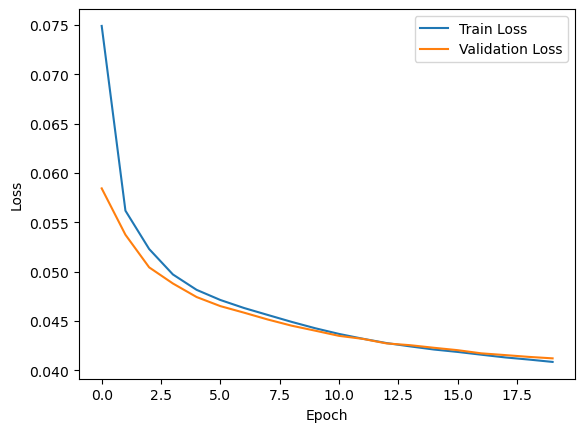

In [4]:
# Train the model
history = fca.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


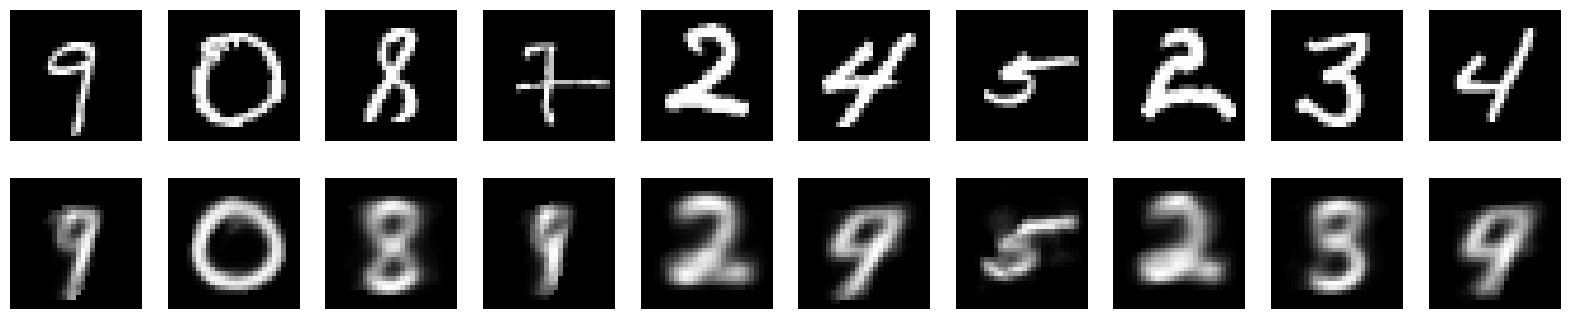

In [5]:
def visualize_reconstructions(model, data, n=10):
    indices = np.random.choice(len(data), n)
    original = data[indices]
    reconstructed = model.predict(original)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.show()

# Visualize decoded images
visualize_reconstructions(fca, x_test)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0976 - val_loss: 0.0428
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0391 - val_loss: 0.0320
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0312 - val_loss: 0.0283
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0281 - val_loss: 0.0263
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0263 - val_loss: 0.0251
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0253 - val_loss: 0.0244
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0246 - val_loss: 0.0238
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0234 - val_loss: 0.0228
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0224 - val_loss: 0.0220
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

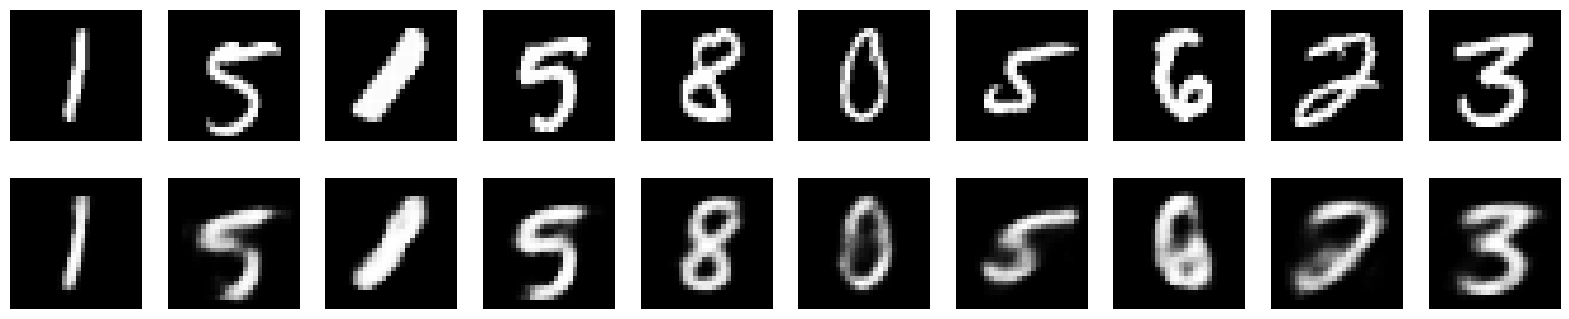

In [6]:
# Experiment with a larger bottleneck size
bottleneck_dim = 10
fca = build_fca(input_dim, bottleneck_dim)
fca.compile(optimizer='adam', loss='mse')
fca.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Visualize reconstructed images
visualize_reconstructions(fca, x_test)
